In [1]:
# Import all the dependencies and define some helpful functions
import numpy as np
import random
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import logging as log
from src.plotting import *
%load_ext autoreload
%autoreload 2

# set plotting style
%matplotlib inline
plt.style.reload_library()
plt.style.use('ucla_presentations')
mpl.rcParams['text.usetex'] = False

# configure logging
log.basicConfig(level= log.INFO, format = '')


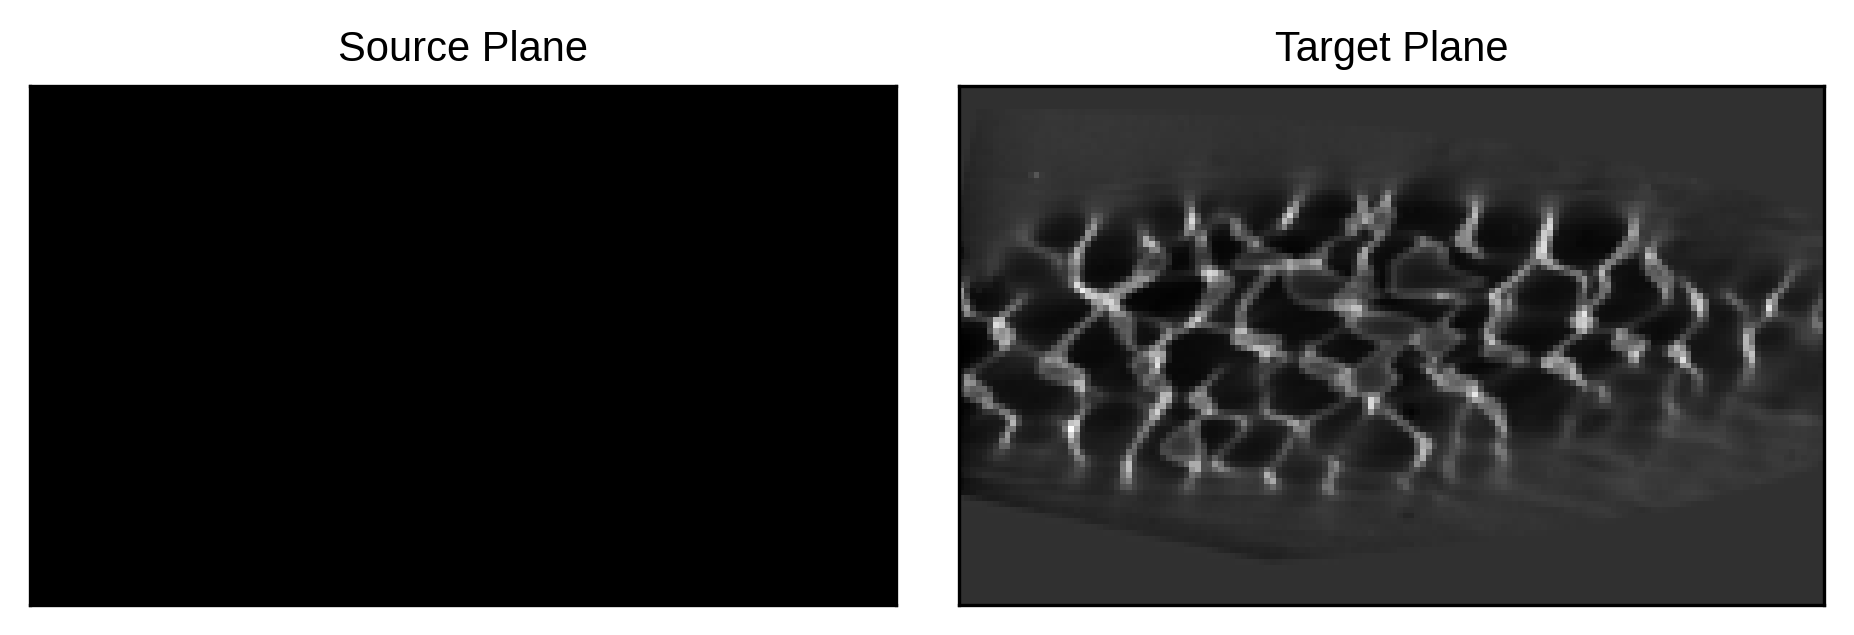

In [7]:
from scipy.io import loadmat

# Load in the benchmark images from binary Matlab files
data_dir = '/home/oods/Research/AE98-99/Analysis/voronoi/test_data/AE98_Bfields/'
fname = data_dir + 'results_23ps_downsampled.mat'
f = loadmat(fname)['results_23ps_downsampled'][0]
tar_img = np.array(f[1], dtype=float)
src_img = np.array(f[0], dtype=float)

# Normalize the images
shape = tar_img.shape
N_pix = shape[0] * shape[1]
tar_img *= N_pix / np.sum(tar_img)
src_img *= N_pix / np.sum(src_img)

fig, (ax1, ax2) = plt.subplots(1,2)
Y, X = np.indices(tar_img.shape)

ax1.pcolormesh(X,Y, src_img, cmap='gray', vmax=tar_img.max())#, vmin = 0)
ax1.set_aspect('equal')
no_ticks(ax1)
ax1.set_title("Source Plane")

ax2.pcolormesh(X, Y, tar_img, cmap='gray', vmax=tar_img.max())#, vmin = 0)
ax2.set_aspect('equal')
no_ticks(ax2)
ax2.set_title("Target Plane")
plt.show()

In [8]:
from src import optimal_transport as ot

N = int(.8 * N_pix)
source = ot.initialize_sites(src_img, N)

Deploying N = 10800 sites on the source plane...
Performing Lloyd relaxation on the source plane...


Optimizing cell weights on the target plane (this will take a while)...
nfev = 0, f = -2760.7
nfev = 5, f = -4190.8
nfev = 10, f = -4996.8
nfev = 15, f = -5261.6
nfev = 20, f = -5458.2
nfev = 25, f = -5640.9
nfev = 30, f = -5817.9
nfev = 35, f = -5979.9
nfev = 40, f = -6154.4
nfev = 45, f = -6315.5
nfev = 50, f = -6462.8
nfev = 55, f = -6602.7
nfev = 60, f = -6715.2
nfev = 65, f = -6785.3
nfev = 70, f = -6840.3
nfev = 75, f = -6889.5
nfev = 80, f = -6939.3
nfev = 85, f = -6981.0
nfev = 90, f = -7013.0
nfev = 95, f = -7041.7
nfev = 100, f = -7073.4
nfev = 105, f = -7101.7
nfev = 110, f = -7121.0
nfev = 115, f = -7143.8
nfev = 120, f = -7172.4
nfev = 125, f = -7197.1
nfev = 130, f = -7221.5
nfev = 135, f = -7247.9
nfev = 140, f = -7266.8
nfev = 145, f = -7283.4
nfev = 150, f = -7305.3
nfev = 155, f = -7324.1
nfev = 160, f = -7332.4
nfev = 165, f = -7351.6
nfev = 170, f = -7368.5
nfev = 175, f = -3372866.9
nfev = 180, f = -3372867.1
nfev = 185, f = -3372867.1
nfev = 190, f = -3372866.9
nf

CPU times: user 5min 19s, sys: 5min 41s, total: 11min 1s
Wall time: 1h 27min 41s


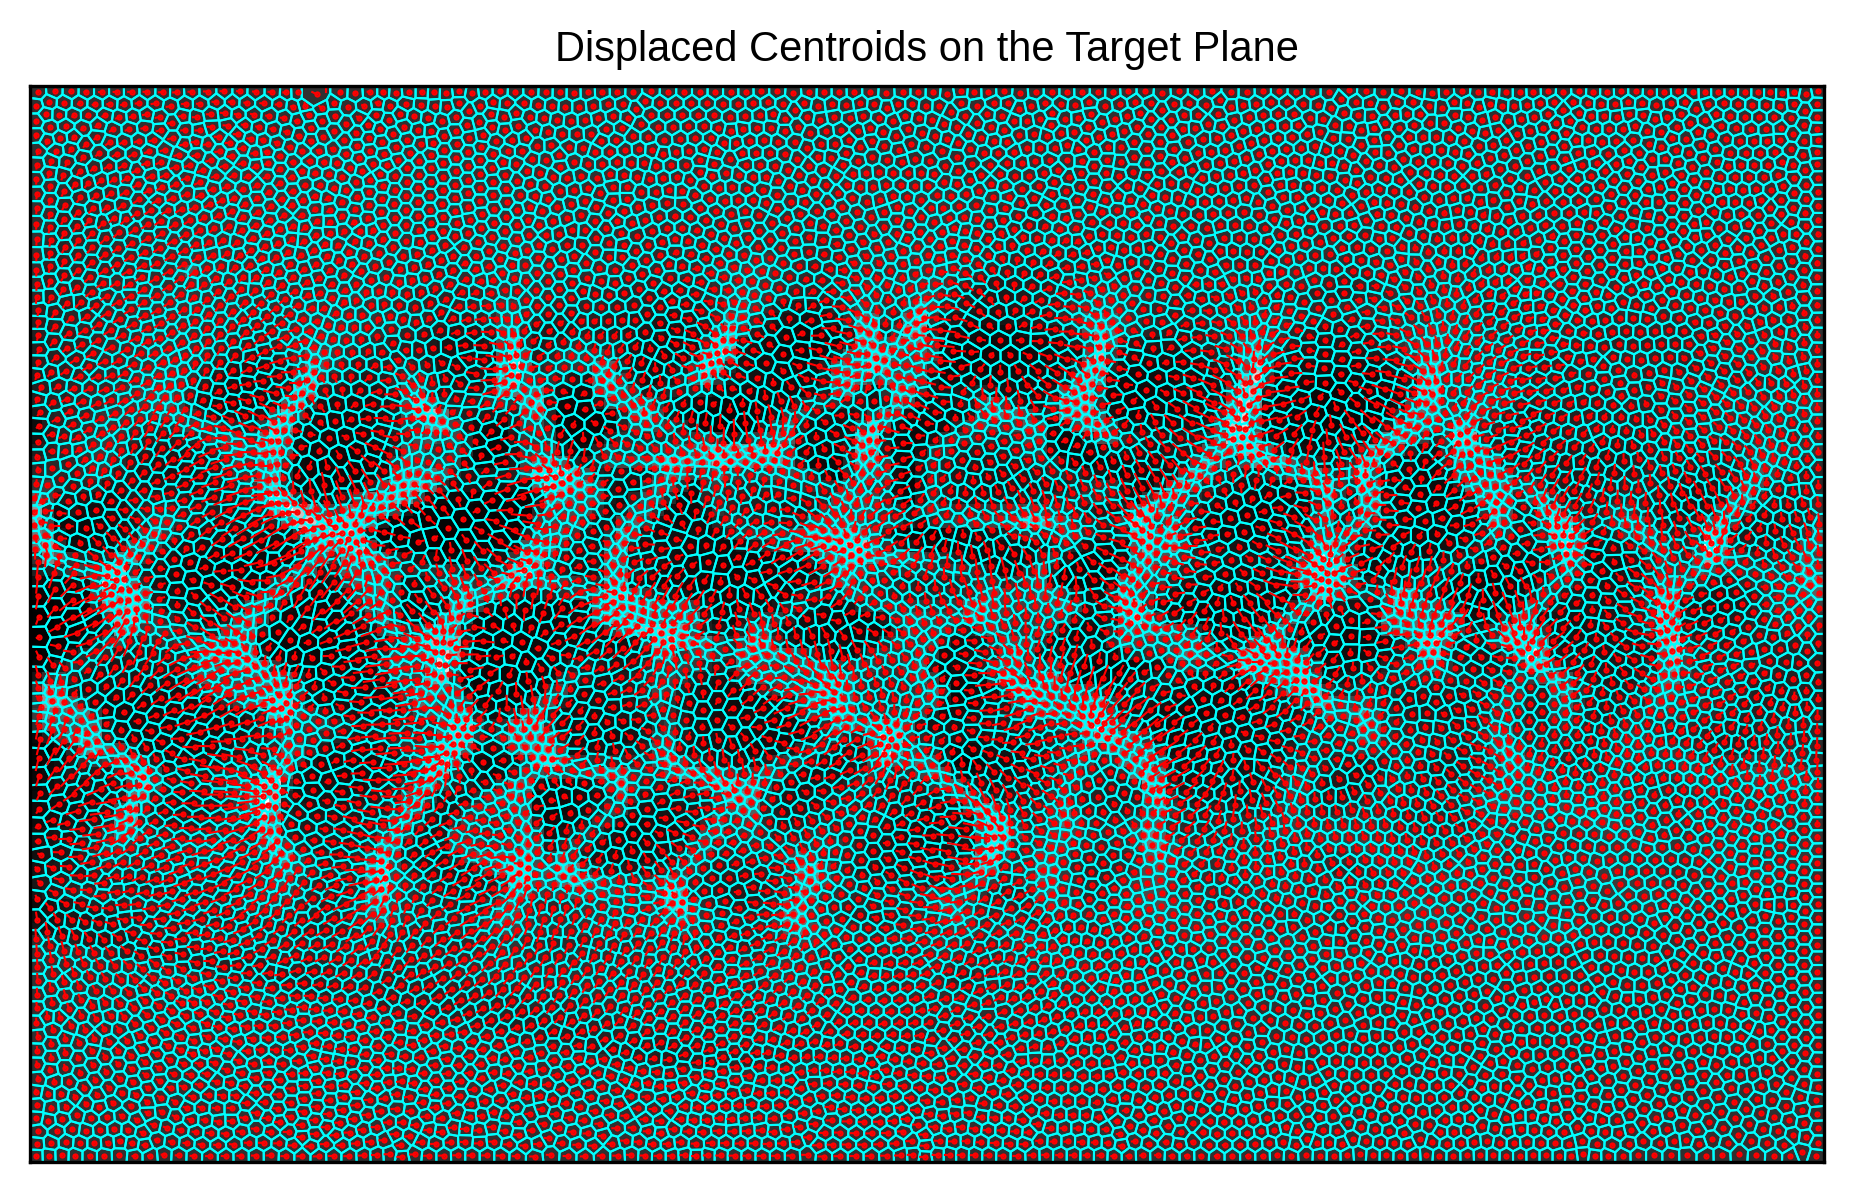

In [9]:
%%time
target, phi_c, a_x, a_y, result = ot.get_deflection_potential(tar_img, src_img, N, sites=source.sites)
ot.plot_displacements(target)

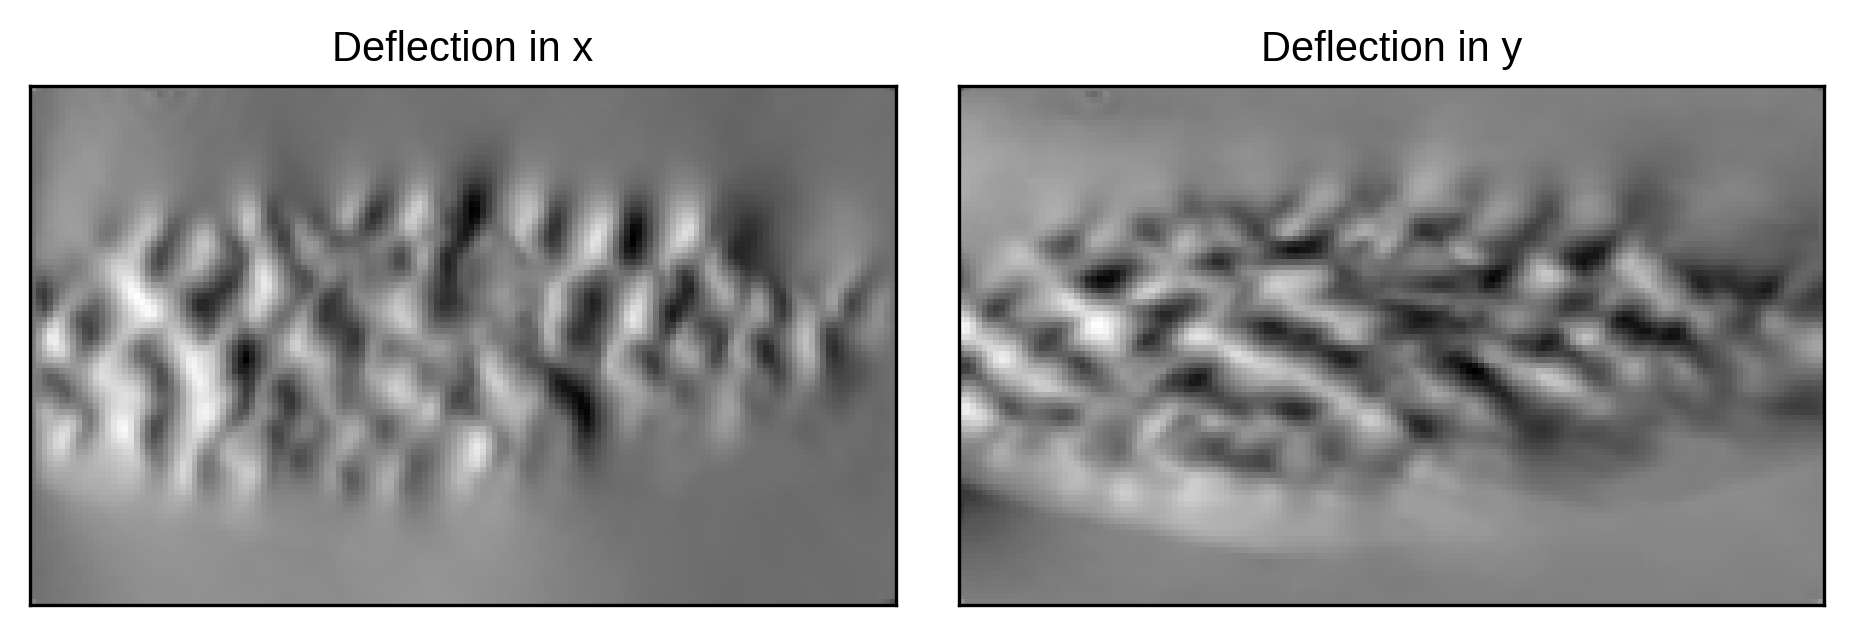

In [10]:
pad = 5

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.pcolormesh(X,Y, a_x, cmap='gray', vmax=a_x[pad:-pad, pad:-pad].max(), vmin = a_x[pad:-pad, pad:-pad].min())
ax1.set_aspect('equal')
no_ticks(ax1)
ax1.set_title("Deflection in x")

ax2.pcolormesh(X,Y, a_y, cmap='gray', vmax=a_y[pad:-pad, pad:-pad].max(), vmin = a_y[pad:-pad, pad:-pad].min())
ax2.set_aspect('equal')
no_ticks(ax2)
ax2.set_title("Deflection in y")
plt.show()

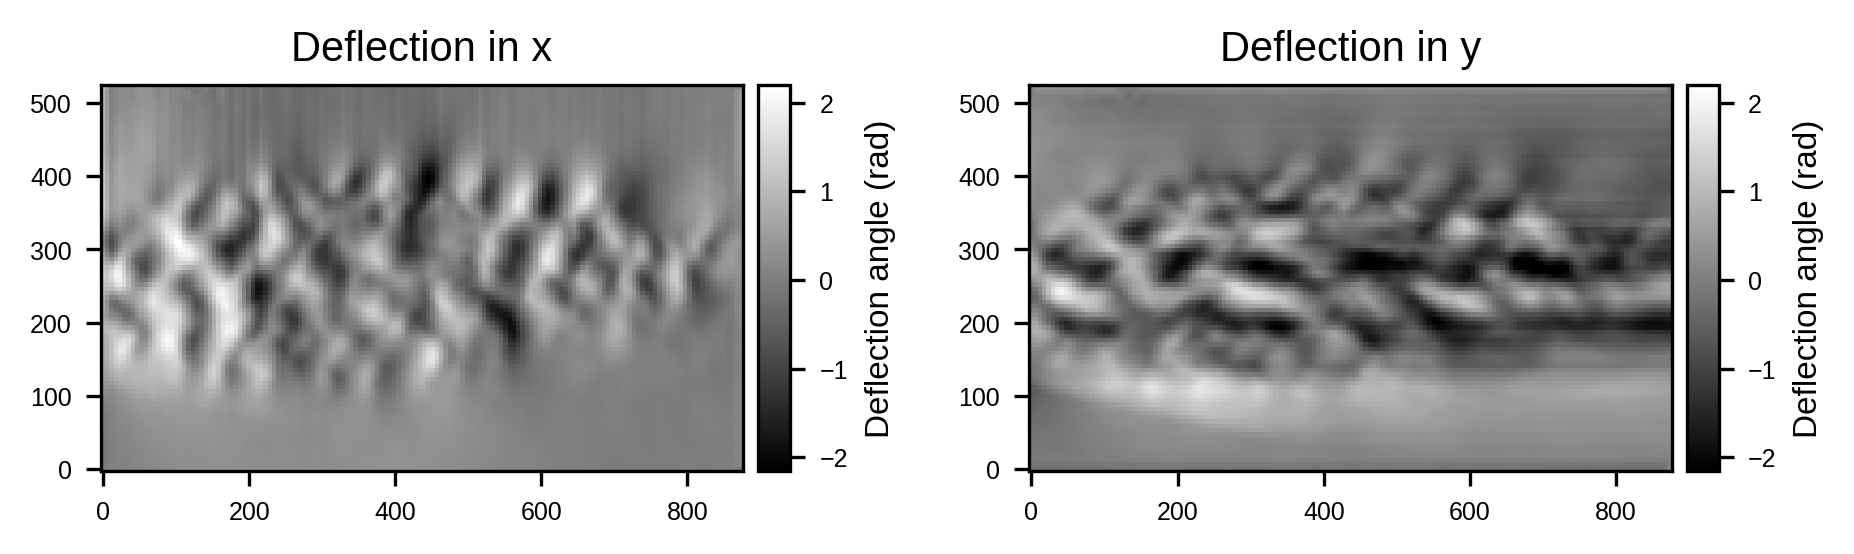

In [41]:
# Convert pixel displacement to deflection angle in radians

pix_size = 5.86   # micron
tar_dist = 300  # micron
M = 12.4 # magnification

Y, X = np.indices(tar_img.shape, dtype=float) * pix_size

phi = phi_c / tar_dist * pix_size**2 * M

angle_y, angle_x = np.gradient(phi)
angle_x *= -1
angle_y *= -1

fig, (ax1, ax2) = plt.subplots(1,2)

im1 = ax1.pcolormesh(X,Y, angle_x, cmap='gray', vmax=angle_x[pad:-pad, pad:-pad].max(), vmin = angle_x[pad:-pad, pad:-pad].min())
ax1.set_aspect('equal')
cbar1 = colorbar(im1)
cbar1.set_label('Deflection angle (rad)')
#no_ticks(ax1)
ax1.set_title("Deflection in x")

im2 = ax2.pcolormesh(X,Y, angle_y, cmap='gray', vmax=angle_x[pad:-pad, pad:-pad].max(), vmin = angle_x[pad:-pad, pad:-pad].min())
ax2.set_aspect('equal')
cbar2 = colorbar(im2)
cbar2.set_label('Deflection angle (rad)')

#no_ticks(ax2)
ax2.set_title("Deflection in y")
plt.show()

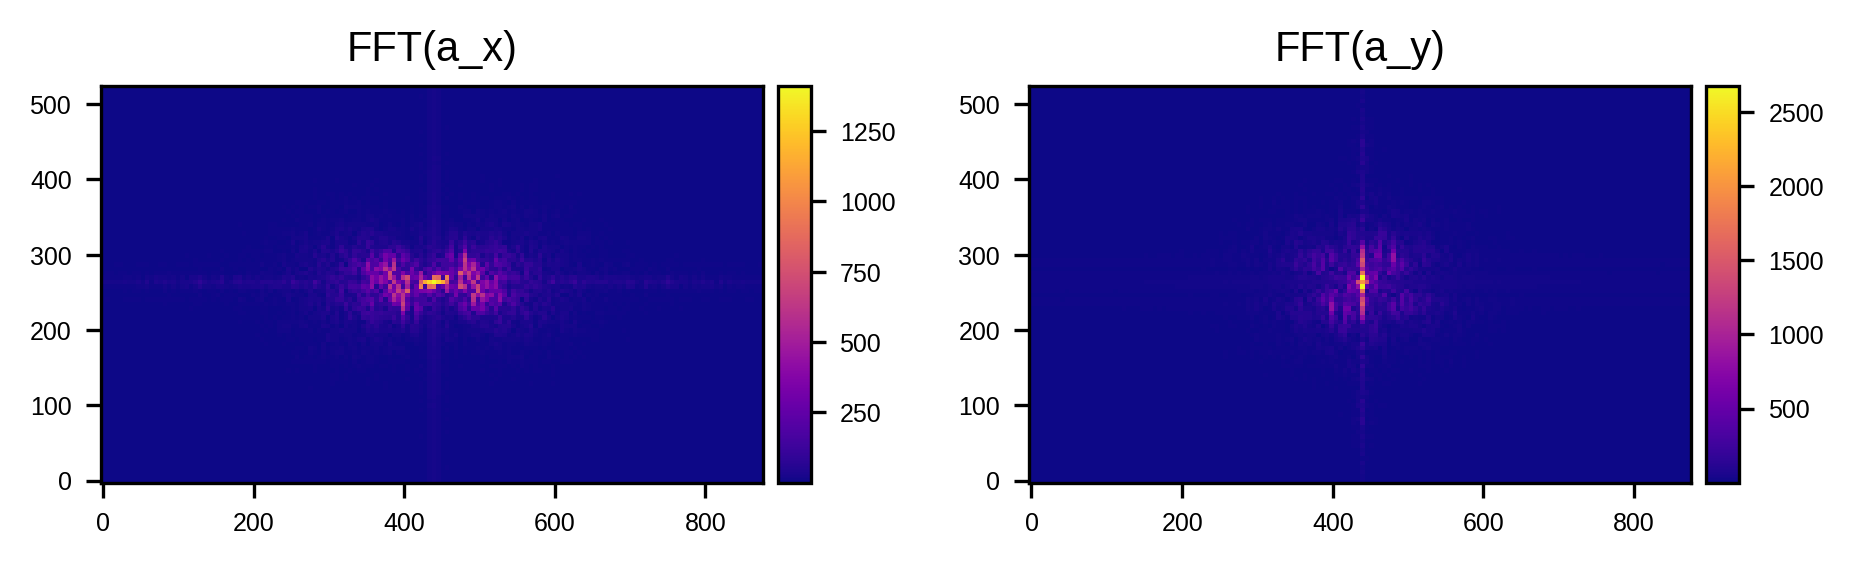

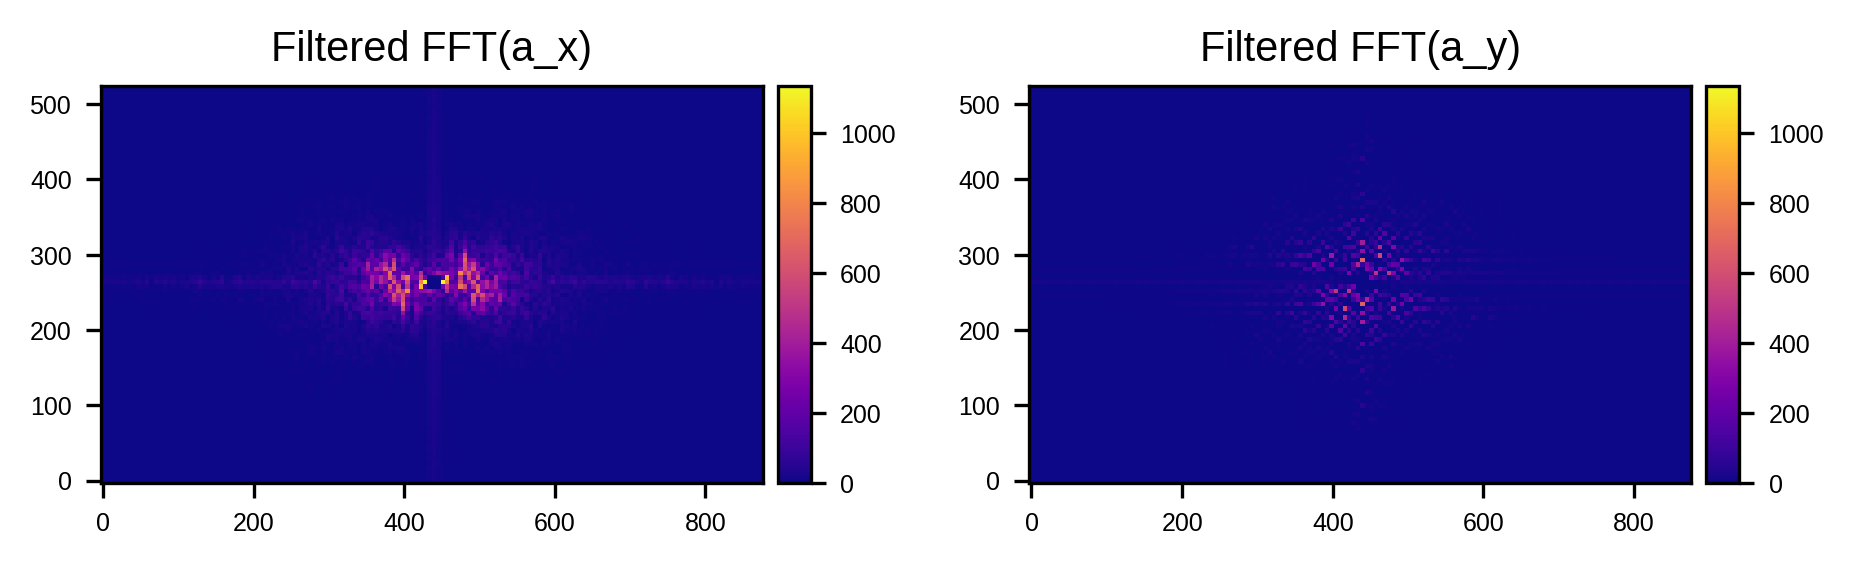

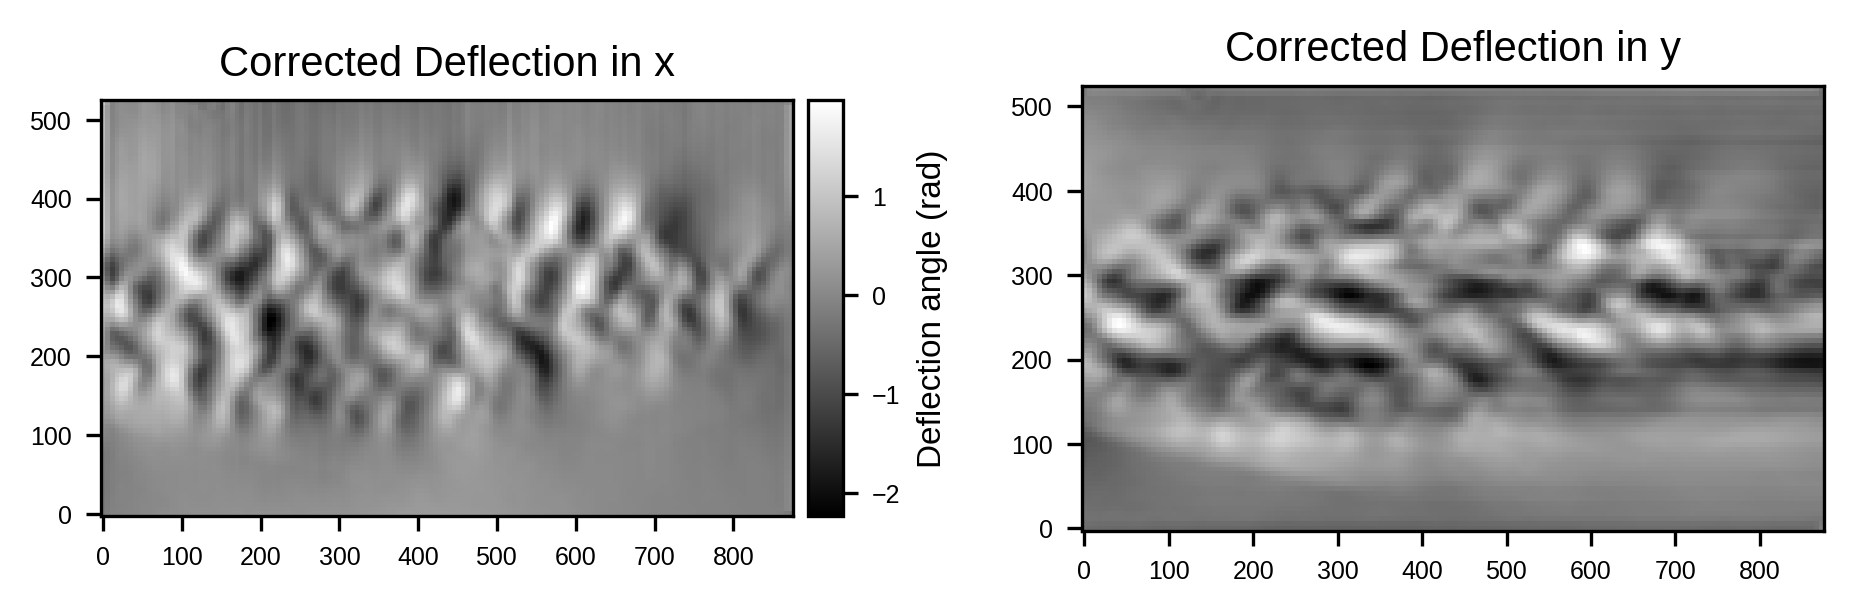

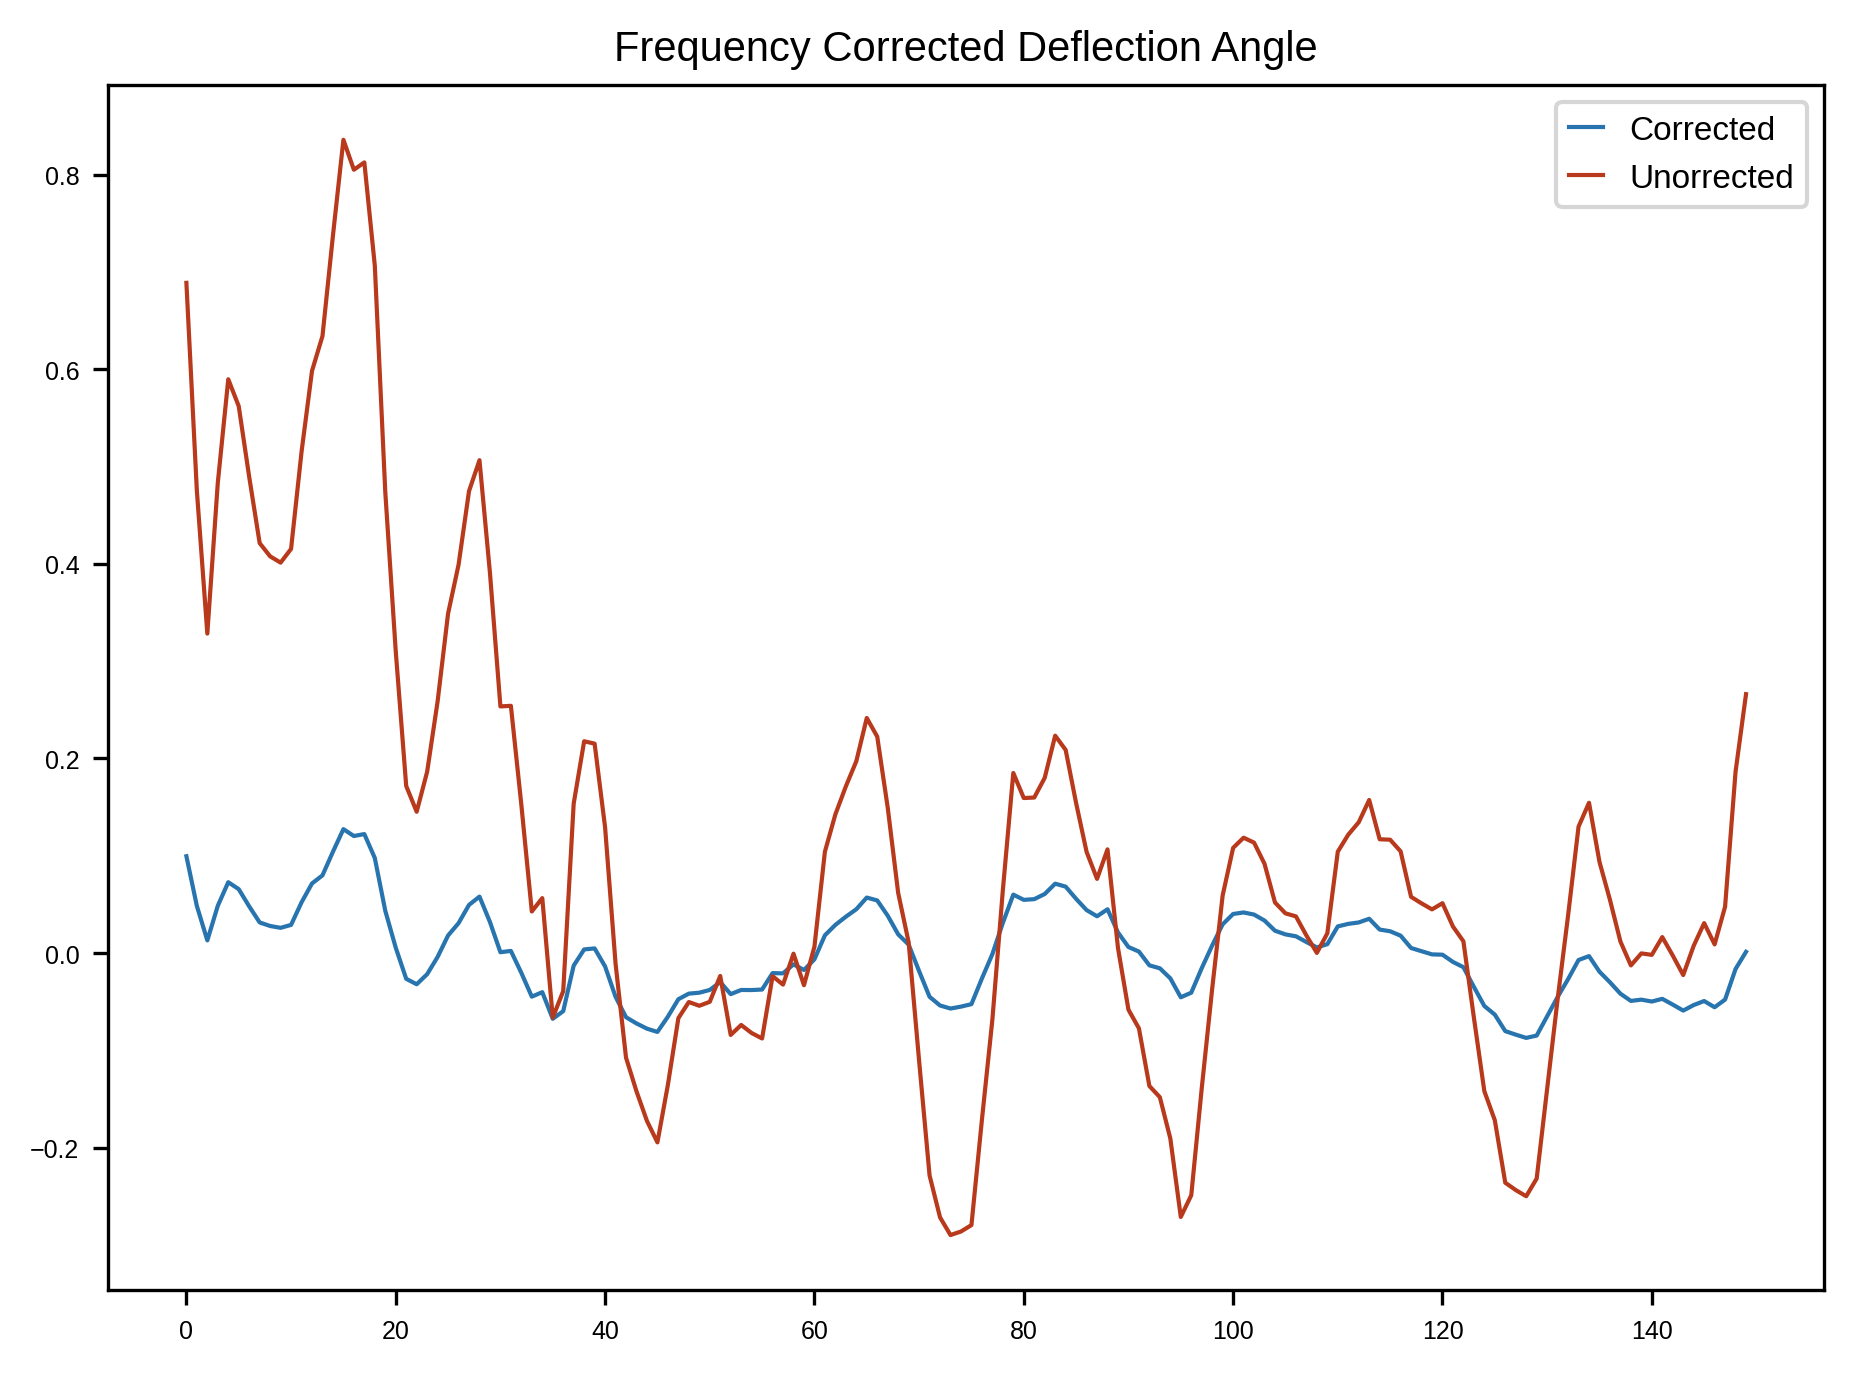

In [43]:
fftx = np.fft.fftshift(np.fft.fft2(angle_x))
ffty = np.fft.fftshift(np.fft.fft2(angle_y))
h, w = tar_img.shape

fig, (ax1, ax2) = plt.subplots(1,2)
im1 = ax1.pcolormesh(X,Y, np.abs(fftx), cmap='plasma')
ax1.set_aspect('equal')
cbar1 = colorbar(im1)
ax1.set_title("FFT(a_x)")

#im2 = ax2.pcolormesh(X,Y, ffty.real, cmap='plasma', vmax=fftx[pad:-pad, pad:-pad].real.max(), vmin = fftx[pad:-pad, pad:-pad].real.min())
im2 = ax2.pcolormesh(X,Y, np.abs(ffty), cmap='plasma')
ax2.set_aspect('equal')
cbar2 = colorbar(im2)

ax2.set_title("FFT(a_y)")
plt.show()

fftx[h//2 -1:h//2 +2, w//2 -1:w//2 +2] = 0
ffty[h//2 -1:h//2 +2, w//2 -1:w//2 +2] = 0
ax_corrected = np.fft.ifft2(np.fft.ifftshift(fftx)).real
ay_corrected = np.fft.ifft2(np.fft.ifftshift(ffty)).real

fig, (ax1, ax2) = plt.subplots(1,2)
im1 = ax1.pcolormesh(X,Y, np.abs(fftx), cmap='plasma')
ax1.set_aspect('equal')
cbar1 = colorbar(im1)
ax1.set_title("Filtered FFT(a_x)")

im2 = ax2.pcolormesh(X,Y, ffty.real, cmap='plasma', vmax=np.abs(fftx).max(), vmin = np.abs(fftx).min())
ax2.set_aspect('equal')
cbar2 = colorbar(im2)

ax2.set_title("Filtered FFT(a_y)")
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2)

im1 = ax1.pcolormesh(X,Y, ax_corrected, cmap='gray')
ax1.set_aspect('equal')
cbar1 = colorbar(im1)
cbar1.set_label('Deflection angle (rad)')
ax1.set_title("Corrected Deflection in x")

im2 = ax2.pcolormesh(X,Y, ay_corrected, cmap='gray')
ax2.set_aspect('equal')
cbar2.set_label('Deflection angle (rad)')

ax2.set_title("Corrected Deflection in y")
plt.show()

fig, ax = plt.subplots()

ax.plot(np.mean(a_corrected, axis=0), label='Corrected')
ax.plot(np.mean(angle_x, axis=0), label='Unorrected')
ax.legend()
ax.set_title("Frequency Corrected Deflection Angle")

plt.show()

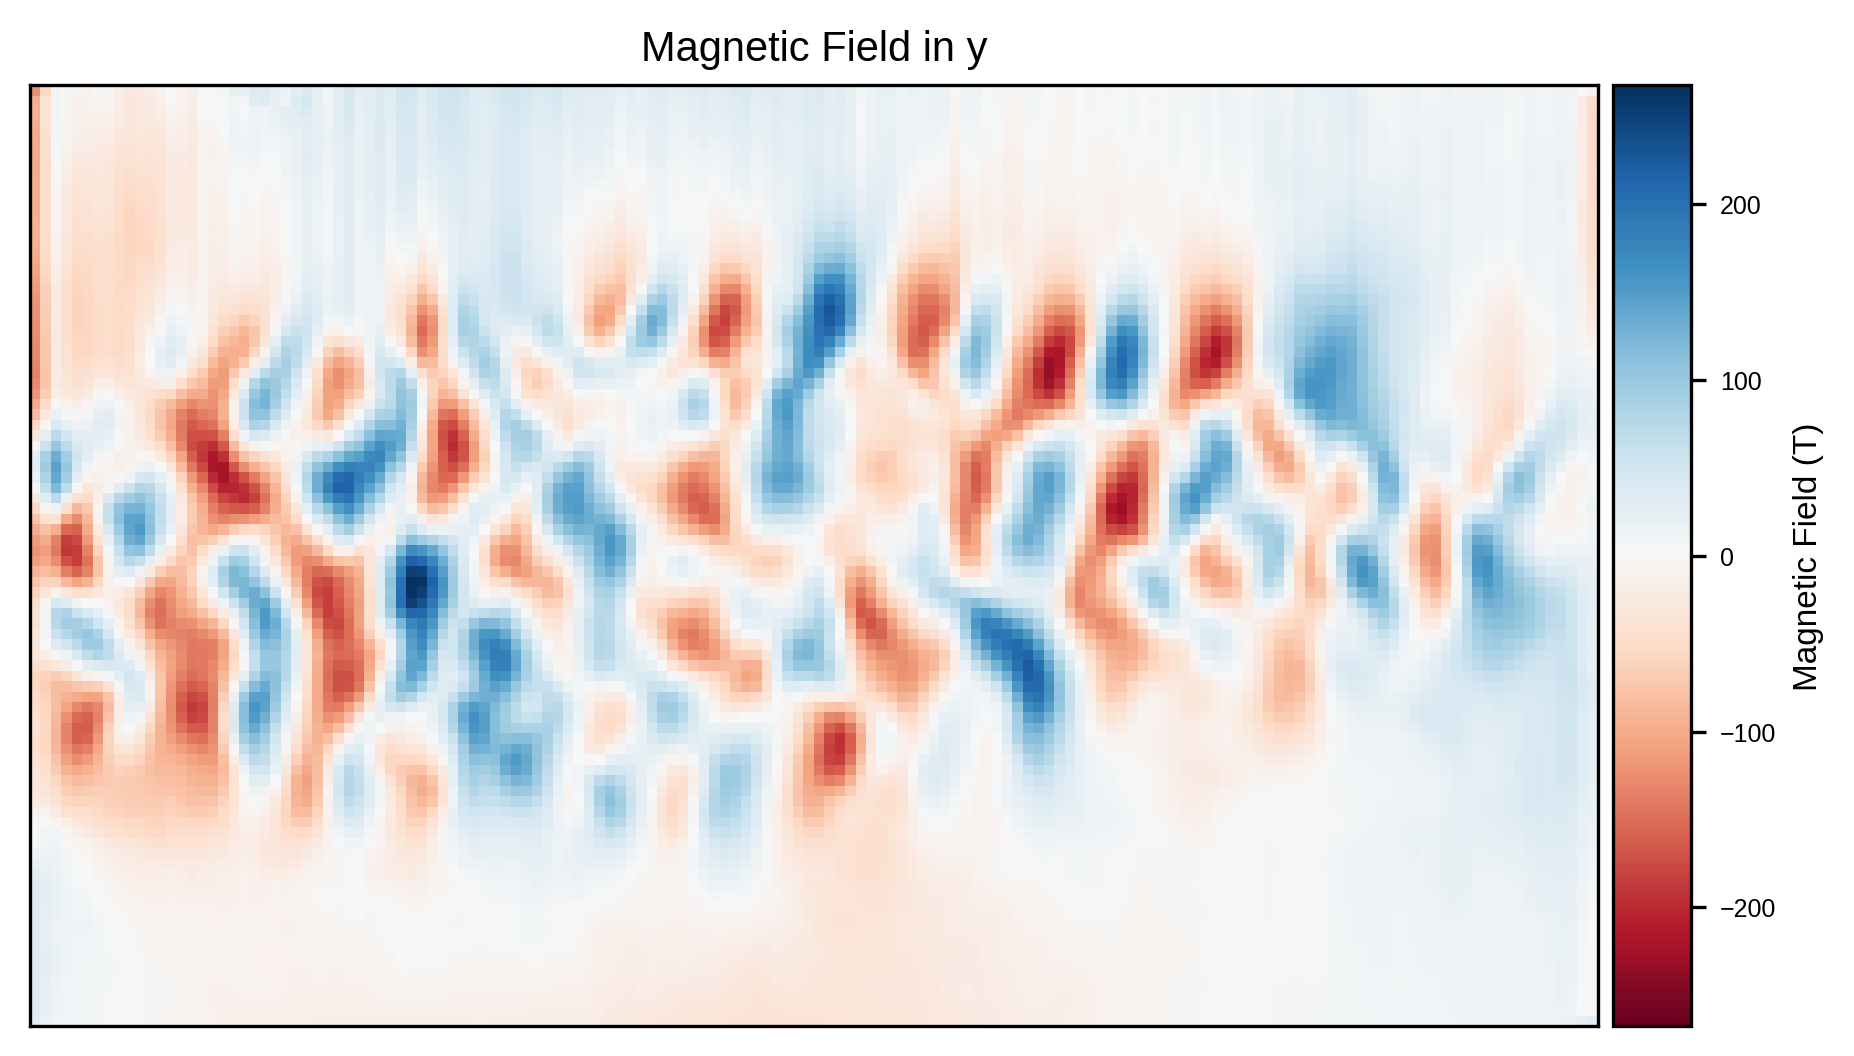

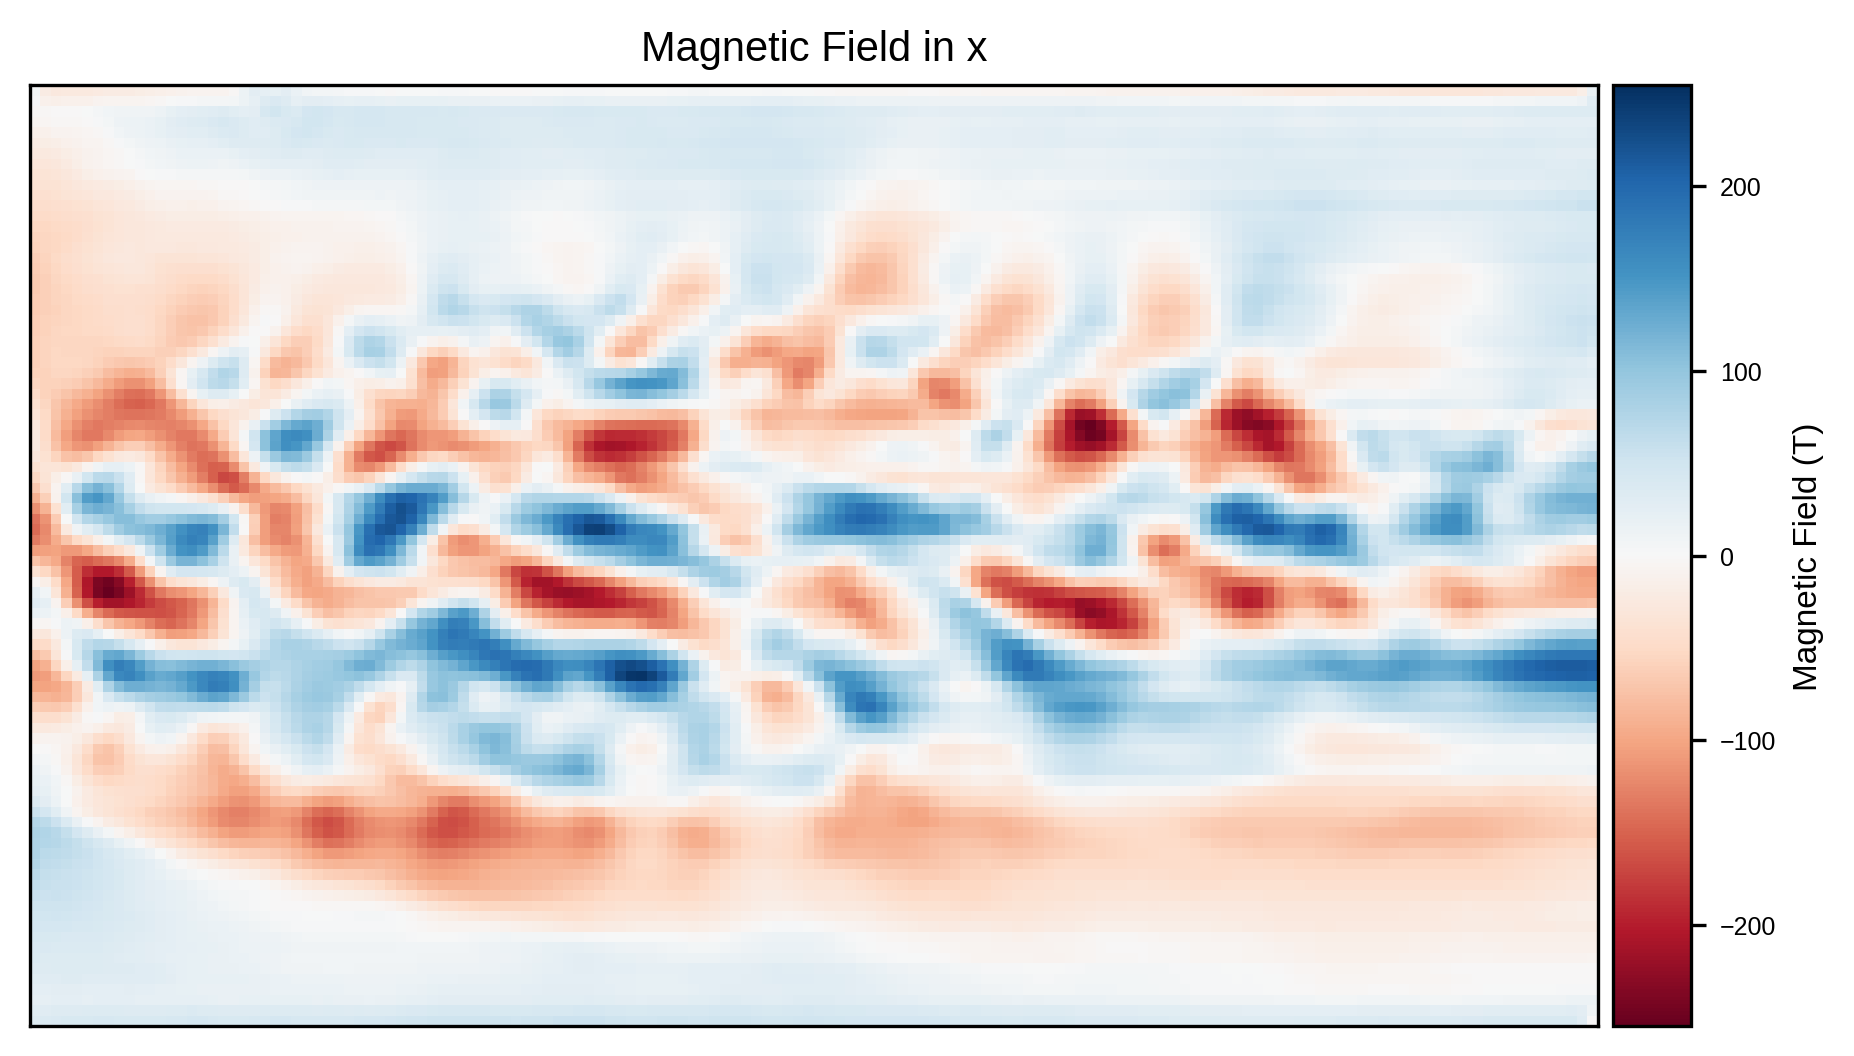

In [44]:
import astropy.units as u
from astropy.constants import e, c, m_e
e = e.to(u.C)

W = 200 * u.um
E = 50.5 * u.MeV
By = (ax_corrected * np.sqrt(2 * m_e * E) / (-1 * e * W)).to(u.T)
Bx = (ay_corrected * np.sqrt(2 * m_e * E) / (-1 * e * W)).to(u.T)

fig, ax = plt.subplots()

im = ax.pcolormesh(X,Y, By, cmap='RdBu',vmax = max(By.max(), abs(By.min())).value, vmin = -1* max(By.max(), abs(By.min())).value)
ax.set_aspect('equal')
cbar = colorbar(im)
cbar.set_label('Magnetic Field (T)')
no_ticks(ax)
ax.set_title("Magnetic Field in y")

plt.show()

fig, ax = plt.subplots()

im = ax.pcolormesh(X,Y, Bx, cmap='RdBu', vmax = max(Bx.max(), abs(Bx.min())).value, vmin = -1* max(Bx.max(), abs(Bx.min())).value)
ax.set_aspect('equal')
cbar = colorbar(im)
cbar.set_label('Magnetic Field (T)')
no_ticks(ax)
ax.set_title("Magnetic Field in x")

plt.show()

In [16]:
np.savez(data_dir+'results.npz',
        source_image = src_img,
        target_image = tar_img,
        sites = target.sites,
        weights = target.weights,
        centroids = target.c,
        phi = phi_c)